In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('TeamStats_2003_2019.csv')
df.Team.unique()

array(['Arsenal', 'Chelsea', 'Manchester Utd', 'Liverpool',
       'Newcastle Utd', 'Aston Villa', 'Charlton Ath', 'Bolton', 'Fulham',
       'Birmingham City', 'Middlesbrough', 'Southampton', 'Portsmouth',
       'Tottenham', 'Blackburn', 'Manchester City', 'Everton',
       'Leicester City', 'Leeds United', 'Wolves', 'West Brom',
       'Crystal Palace', 'Norwich City', 'West Ham', 'Wigan Athletic',
       'Sunderland', 'Reading', 'Sheffield Utd', 'Watford',
       'Derby County', 'Stoke City', 'Hull City', 'Burnley', 'Blackpool',
       'Swansea City', 'QPR', 'Cardiff City', 'Bournemouth', 'Brighton',
       'Huddersfield'], dtype=object)

In [2]:
df_Arsenal = df.loc[df['Team'] == 'Arsenal']
df_Tottenham = df.loc[df['Team'] == 'Tottenham']
df_WestHam = df.loc[df['Team'] == 'West Ham']

In [3]:
df_Arsenal.insert(13,"Relocation", "Pre")
df_Tottenham.insert(13,"Relocation", "Pre")
df_WestHam.insert(13,"Relocation", "Pre")

In [4]:
df_Arsenal.loc[(df_Arsenal.Year > 2005),'Relocation']='Post'
df_WestHam.loc[(df_WestHam.Year > 2015),'Relocation']='Post'
df_Tottenham.loc[(df_Tottenham.Year > 2016),'Relocation']='Post'

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
df_Arsenal.head(19)

Year  rank     Team  games  wins  draws  losses  goals_for  \
0    2003     1  Arsenal     38    26     12       0         73   
21   2004     2  Arsenal     38    25      8       5         87   
43   2005     4  Arsenal     38    20      7      11         68   
63   2006     4  Arsenal     38    19     11       8         63   
82   2007     3  Arsenal     38    24     11       3         74   
103  2008     4  Arsenal     38    20     12       6         68   
122  2009     3  Arsenal     38    23      6       9         83   
143  2010     4  Arsenal     38    19     11       8         72   
162  2011     3  Arsenal     38    21      7      10         74   
183  2012     4  Arsenal     38    21     10       7         72   
203  2013     4  Arsenal     38    24      7       7         68   
222  2014     3  Arsenal     38    22      9       7         71   
241  2015     2  Arsenal     38    20     11       7         65   
264  2016     5  Arsenal     38    23      6       9         77   
285  2017     6  Arsenal     38    19      6      13         74   
304  2018     5  Arsenal     38    21      7      10         73   
327  2019     8  Arsenal     38    14     14      10         56   

     goals_against  goal_diff  points  attendance_per_g   winperc Relocation  
0               26         47      90             38079  0.684211        Pre  
21              36         51      83             37979  0.657895        Pre  
43              31         37      67             38184  0.526316        Pre  
63              35         28      68             60140  0.500000       Post  
82              31         43      83             60070  0.631579       Post  
103             37         31      72             60040  0.526316       Post  
122             41         42      75             59927  0.605263       Post  
143             43         29      68             60025  0.500000       Post  
162             49         25      70             60000  0.552632       Post  
183             37         35      73             60079  0.552632       Post  
203             41         27      79             60013  0.631579       Post  
222             36         35      75             59992  0.578947       Post  
241             36         29      71             59944  0.526316       Post  
264             44         33      75             59957  0.605263       Post  
285             51         23      63             59323  0.500000       Post  
304             51         22      70             59899  0.552632       Post  
327             48          8      56             47589  0.368421       Post

In [6]:
df_ArsenalTrim = df_Arsenal[["Relocation","winperc"]]
df_WestHamTrim = df_WestHam[["Relocation","winperc"]]
df_TottenhamTrim = df_Tottenham[["Relocation","winperc"]]

In [7]:
df_Arsenal["attendance_per_g"] = pd.to_numeric(df_Arsenal["attendance_per_g"])
df_WestHam["attendance_per_g"] = pd.to_numeric(df_WestHam["attendance_per_g"])
df_Tottenham["attendance_per_g"] = pd.to_numeric(df_Tottenham["attendance_per_g"])

df_ArsenalTrimAtt = df_Arsenal[["Relocation","attendance_per_g"]]
df_WestHamTrimAtt = df_WestHam[["Relocation","attendance_per_g"]]
df_TottenhamTrimAtt = df_Tottenham[["Relocation","attendance_per_g"]]

C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [8]:
df_ArsenalTrim = df_ArsenalTrim.groupby('Relocation')['winperc'].mean().reset_index()
df_WestHamTrim = df_WestHamTrim.groupby('Relocation')['winperc'].mean().reset_index()
df_TottenhamTrim = df_TottenhamTrim.groupby('Relocation')['winperc'].mean().reset_index()

In [9]:
df_ArsenalTrimAtt = df_ArsenalTrimAtt.groupby('Relocation')['attendance_per_g'].mean().reset_index()
df_WestHamTrimAtt = df_WestHamTrimAtt.groupby('Relocation')['attendance_per_g'].mean().reset_index()
df_TottenhamTrimAtt = df_TottenhamTrimAtt.groupby('Relocation')['attendance_per_g'].mean().reset_index()

In [10]:
df_ArsenalTrim.insert(2,"Team", "Arsenal")
df_WestHamTrim.insert(2,"Team", "WestHam")
df_TottenhamTrim.insert(2,"Team", "Tottenham")

In [11]:
df_ArsenalTrimAtt.insert(2,"Team", "Arsenal")
df_WestHamTrimAtt.insert(2,"Team", "WestHam")
df_TottenhamTrimAtt.insert(2,"Team", "Tottenham")

In [12]:
df_winperc = pd.concat([df_ArsenalTrim, df_WestHamTrim, df_TottenhamTrim])

In [13]:
df_attend = pd.concat([df_ArsenalTrimAtt, df_WestHamTrimAtt, df_TottenhamTrimAtt])

In [14]:
df_attend['avg_attendance_per_g'] = df_attend['attendance_per_g'].apply(np.floor)

In [15]:
del df_attend['attendance_per_g']

In [16]:
df_attend

Relocation       Team  avg_attendance_per_g
0       Post    Arsenal               59071.0
1        Pre    Arsenal               38080.0
0       Post    WestHam               54087.0
1        Pre    WestHam               34313.0
0       Post  Tottenham               55308.0
1        Pre  Tottenham               35500.0

In [17]:
df_winperc

Relocation   winperc       Team
0       Post  0.545113    Arsenal
1        Pre  0.622807    Arsenal
0       Post  0.309211    WestHam
1        Pre  0.318421    WestHam
0       Post  0.543860  Tottenham
1        Pre  0.469925  Tottenham

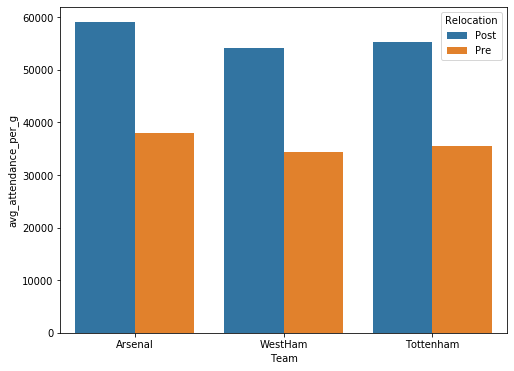

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]


sns.barplot(x='Team', y = 'avg_attendance_per_g', hue = 'Relocation', data =df_attend)

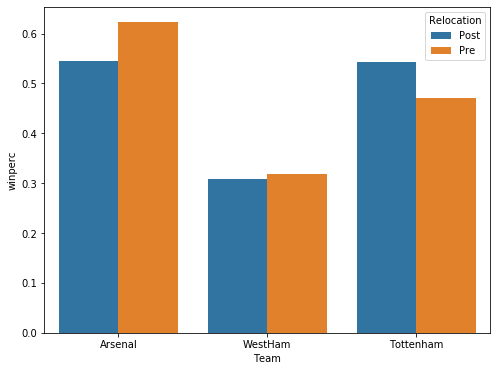

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]


sns.barplot(x='Team', y = 'winperc', hue = 'Relocation', data =df_winperc)

In [ ]:
#can expect an average 19k additional fans after relocation which aquates to an additional 1,657,500 pounds a yr.